## Univariate Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the training set
df = pd.read_csv('kdd_train.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [14]:
# create categories
dos = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 
   
       'pod', 'processtable','smurf','teardrop','udpstorm','worm']

probe = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

u2r = ['buffer_overflow', 'loadmdoule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']

r2l = ['ftp_write', 'guess_passwd', 'http_tunnel', 'imap', 'multihop', 'named', 'phf',
       'sendmail', 'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster',
       'xclock','xsnoop']


# df['new_label'] = df.labels != 'normal'
def map_attack(attack):
    '''Function to map attack type to the four categories listed above'''
    if attack in dos:
        value = 'DoS'
    elif attack in probe:
        value = 'Probe'
    elif attack in u2r:
        value = 'U2R'
    elif attack in r2l:
        value = 'R2L'
    else:
        value = 'Normal'
    return value

# Feature engineer a new column based on the map_attack() function
# for the training set and the test set
df['new_label'] = df.labels.map(map_attack)

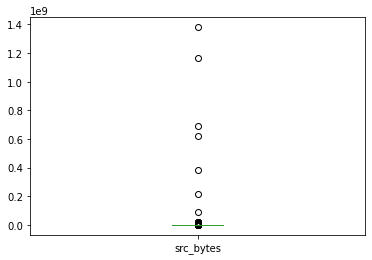

In [4]:
df.src_bytes.plot(kind='box');

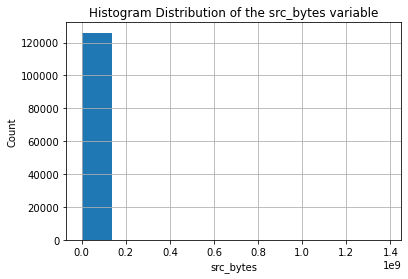

In [10]:
# Histogram distribution of the src_bytes column
df.src_bytes.hist()
plt.xlabel('src_bytes')
plt.ylabel('Count')
plt.title('Histogram Distribution of the src_bytes variable');

In [ ]:
binsize = np.arange(0, df['src_bytes'].max()+0.2, 0.2)
df['src_bytes'].hist(bins=binsize);

Most of the values of the src_bytes variable falls within the rage of 0 to 0.15

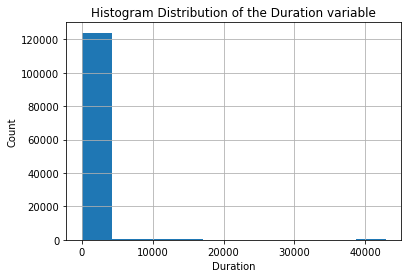

In [9]:
# Histogram distribution of the duration column
df.duration.hist()
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Histogram Distribution of the Duration variable');

Most of the values of duration variable fall between the range of 0 to 5000.

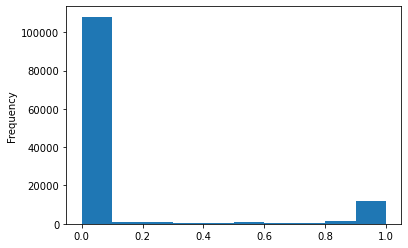

In [7]:
df.dst_host_rerror_rate.plot(kind='hist');

## Biviariate Analysis

In [11]:
def viobox(df, x, y, suptitle):
    '''
    Function to compare the classes of a categorical variable with a numerical variable
    using a facetted boxplot and violin plot.
    
    df: DataFrame, Dataset
    x: str, categorical variable on the x-axis
    y: str, numeric variable on the y-axis
    suptitle: str, title of the plot
    color: str, color of the plot [default is base_color]
    '''
    base_color = sns.color_palette()[0]
    plt.figure(figsize=[20,5])
    plt.suptitle(suptitle, fontsize=15)
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=x, y=y, color=base_color);
    plt.subplot(1,2,2)
    sns.violinplot(data=df, x=x, y=y, color=base_color);

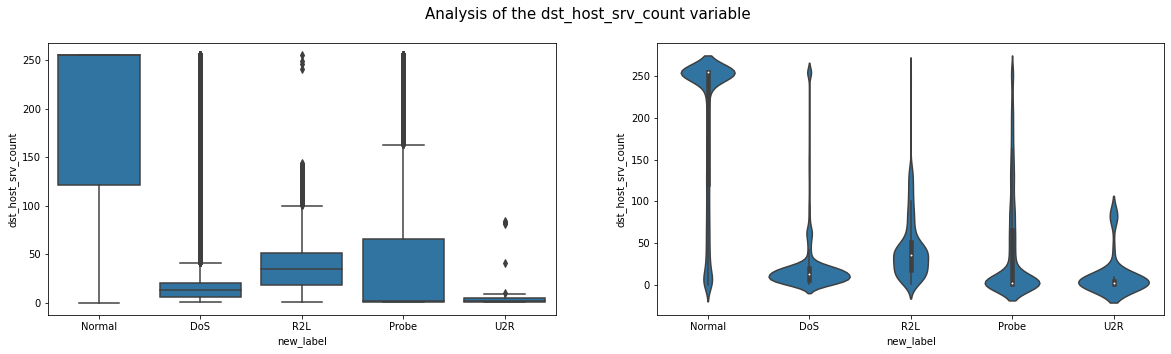

In [16]:
viobox(df=df, x='new_label', y='dst_host_srv_count',
       suptitle='Analysis of the dst_host_srv_count variable')

The violin plot on the right shows that most normal connections have a dst_host_srv_count value of above 200. If the value of the dst_host_srv_count is below 50, there is a possibility that there is an attack. 

The box plot shows on the left shows that there are some outliers that range up to 250 for the Dos, R2L, Probe, and U2R attacks. The median values for these attacks is below 50.

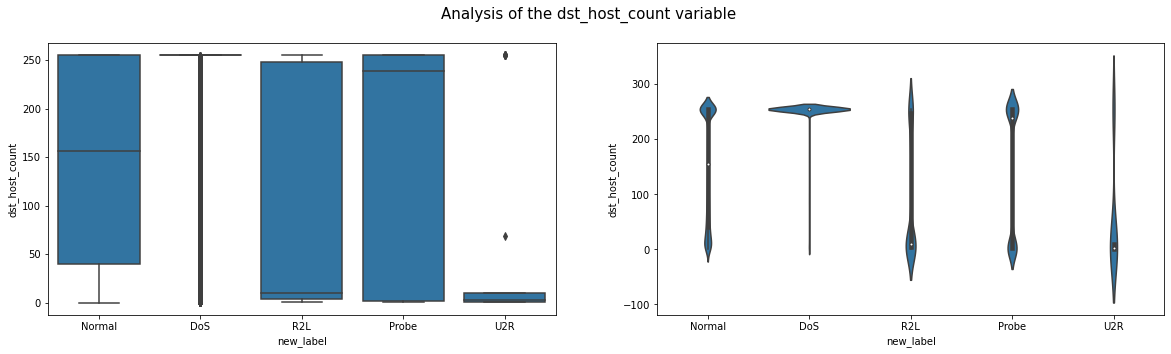

In [23]:
viobox(df=df, x='new_label', y='dst_host_count',
       suptitle='Analysis of the dst_host_count variable')

From the box plot on the left, the median score of the normal connection for the dst_host_count variable is around 150. THe median scores of R2L and U2R attacks is below 50. The median scores of the Probe and DoS attacks is over 250.

The violin plot shows that if the the value of dst_host_count is above 200, there is a strong chance it might be a DoS attack.

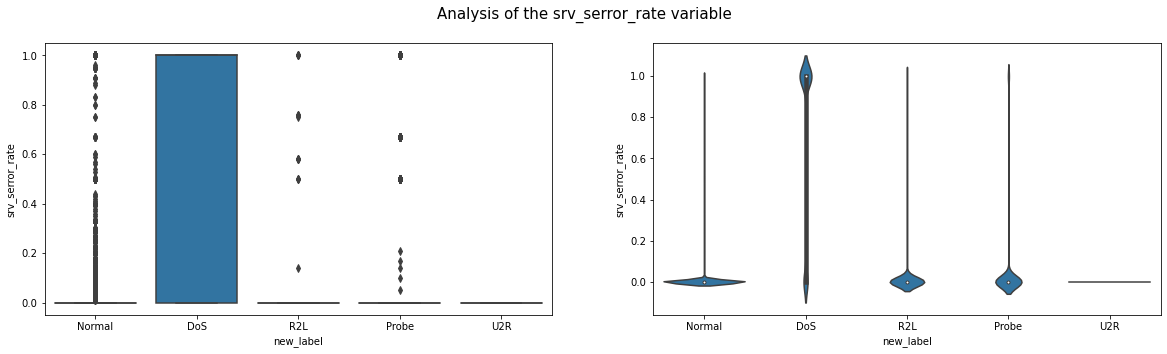

In [25]:
viobox(df=df, x='new_label', y='srv_serror_rate',
       suptitle='Analysis of the srv_serror_rate variable')

The violin plot on the right shows that the value of the srv_serror_rate for all U2R attacks does not exceed 0.2.
Most normal connections, R2L and Probe attacks also fall within the range of 0 - 0.2. Most DoS attacks have srv_serror_rate of above 0.8.

If the value of srv_serror_rate is above 0.8, there's a chance it could be a DoS attack.

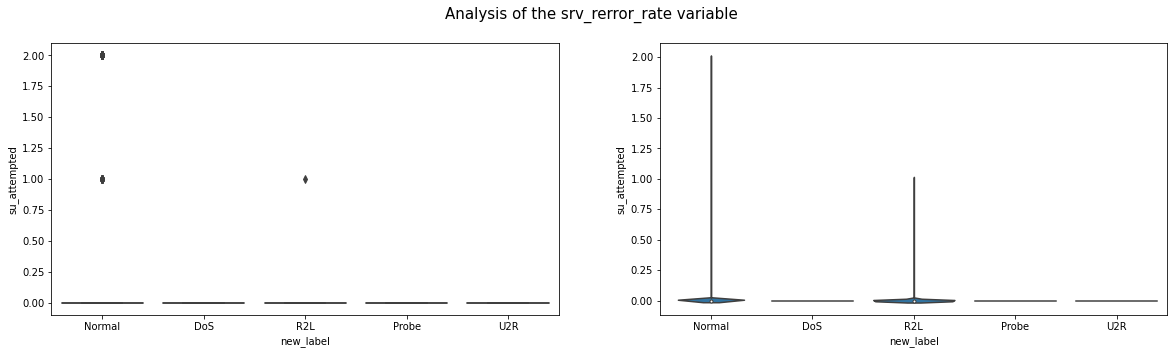

In [31]:
viobox(df=df, x='new_label', y='su_attempted',
       suptitle='Analysis of the srv_rerror_rate variable')

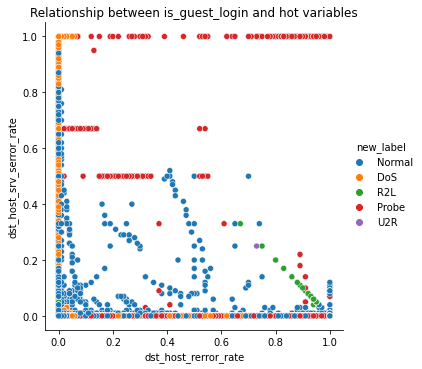

In [35]:
sns.relplot(data=df, y='dst_host_srv_serror_rate', x='dst_host_rerror_rate', hue='new_label')
plt.title('Relationship between is_guest_login and hot variables');